# Multi-line Labels in Facets


The 'newline' character (`\n`) now works as a 'line break' in the facet titles.</br> 
Automatic line breaking is performed according to the  text length limit specified with parameters `labwidth` in `facet_wrap()` and `x_labwidth`/`y_labwidth` in `facet_grid()`.

The margins around the facet titles are controlled by the `margin` parameter in `element_text()`.</br> 
Horizontal and vertical justifications - using `hjust` and `vjust` parameter in `element_text()`.

In [1]:
import pandas as pd
from lets_plot import *


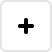
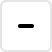
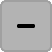
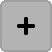
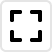
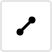
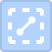
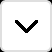
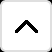
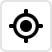
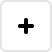
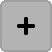
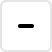
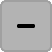
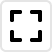
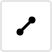
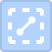
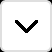
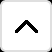
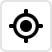

In [2]:
LetsPlot.setup_html()

In [3]:
data = pd.DataFrame.from_records([
    ("pet", "cat", 5, "carnivore"),
    ("pet", "dog", 10, "carnivore"),
    ("pet", "rabbit", 2, "herbivore"),
    ("pet", "hamster", 1, "herbivore"),

    ("farm animal", "cow", 500, "herbivore"),
    ("farm animal", "pig", 100, "carnivore"),
    ("farm animal", "horse", 700, "herbivore"),
])
data.columns = ("animal_type", "animal", "weight", "diet")

### Facet Labels

In [4]:
p = ggplot(data, aes(x="animal", y="weight")) + \
    geom_bar(stat="identity") + \
    theme_bw() + \
    theme(panel_grid_minor=element_blank())

#### Default

In [5]:
p + facet_wrap(facets="animal_type", ncol=2, scales="free")

#### Wrap Labels using `labwidth`-parameters

In [6]:
p + facet_wrap(facets="animal_type", ncol=2, scales="free", labwidth=6)

In [7]:
p + facet_grid(x="animal_type", y="diet", scales="free", x_labwidth=6)

#### Line Breaks Using `\n` in Facet Values

In [8]:
data["animal_type"] = data["animal_type"].str.replace(' ', '\n')
data

,animal_type,animal,weight,diet
0,pet,cat,5,carnivore
1,pet,dog,10,carnivore
2,pet,rabbit,2,herbivore
3,pet,hamster,1,herbivore
4,farm\nanimal,cow,500,herbivore
5,farm\nanimal,pig,100,carnivore
6,farm\nanimal,horse,700,herbivore


In [9]:
p + facet_grid(x="animal_type", y="diet", scales="free")

In [10]:
p + facet_wrap(facets=["animal_type", "diet"], ncol=4, scales="free")

### Text Justifications

In [11]:
p + \
    facet_wrap(facets=["animal_type", "diet"], ncol=4, scales="free") + \
    theme(strip_text=element_text(hjust=1, vjust=1))

### Margins Around the Text Element

In [12]:
p + \
    facet_grid(x="animal_type", y="diet", scales="free") + \
    theme(strip_text=element_text(margin=[10, 30], hjust=0, vjust=1))